 # МЕТОДЫ ПРОГРАММИРОВАНИЯ. Лабораторная №2 

## Создаем новые таблицы:

In [3]:
import random
import string
import pandas as pd

In [4]:
def generate_random_string(length):
    letters = string.ascii_lowercase
    rand_string = ''.join(random.choice(letters) for i in range(length))
    return rand_string

In [5]:
def make_table(n):
    full_names = []
    ranks = []
    numbers = []
    ages = []
    for i in range(n):
        name_lenghth = random.randint(10, 25)
        rank_length = random.randint(8, 16)
        full_names.append(generate_random_string(name_lenghth))
        ranks.append(generate_random_string(rank_length))
        numbers.append(random.randint(1, 20))
        ages.append(random.randint(20, 65))
    table_name = '/Users/sofia/Desktop/учеба/3 курс/методы проги/лаба2/table' + str(n) + '.csv'  
    df = pd.DataFrame({'ФИО': full_names, 'звание': ranks, 'номер роты': numbers, 'возраст': ages})
    df.to_csv(table_name, index= False)
    print(table_name)   

In [36]:
ns = [100, 500, 1000, 5000, 10000, 50000, 100000, 200000]
for i in ns:
    make_table(i)

/Users/sofia/Desktop/учеба/3 курс/методы проги/лаба2/table100.csv
/Users/sofia/Desktop/учеба/3 курс/методы проги/лаба2/table500.csv
/Users/sofia/Desktop/учеба/3 курс/методы проги/лаба2/table1000.csv
/Users/sofia/Desktop/учеба/3 курс/методы проги/лаба2/table5000.csv
/Users/sofia/Desktop/учеба/3 курс/методы проги/лаба2/table10000.csv
/Users/sofia/Desktop/учеба/3 курс/методы проги/лаба2/table50000.csv
/Users/sofia/Desktop/учеба/3 курс/методы проги/лаба2/table100000.csv
/Users/sofia/Desktop/учеба/3 курс/методы проги/лаба2/table200000.csv


## Считываем таблицы:

In [8]:
def read_table(n):
    tables = []
    for i in n:
        table_name = 'table' + str(i) + '.csv'
        table_from = pd.read_csv(table_name)
        tables.append(table_from)
    return tables

In [9]:
tables = read_table(ns)

##  Переделываем таблицы в классы

In [10]:
class Table:
    def __init__(self, raw: pd.core.series.Series):
        self.name = raw[0]
        self.status = raw[1]
        self.number = raw[2]
        self.age = raw[3]
        
    def __eq__(self, other): #x = y
        if self.name == other.name:
            if self.status == other.status:
                if self.number == other.number:
                    if self.age == other.age:
                        return True
        return False
    
    def __ne__(self, other): #x != y
        if self == other:
            return False
        else:
            return True
        
    def __lt__(self, other): #x < y
        if self.status < other.status:
            return True
        elif self.status == other.status:
            if self.name < other.name:
                return True
            elif self.name == other.name:
                if self.number < other.number:
                    return True
        return False
    
    def __gt__(self, other): #x > y
        if self.status > other.status:
            return True
        elif self.status == other.status:
            if self.name > other.name:
                return True
            elif self.name == other.name:
                if self.number > other.number:
                    return True
        return False
    
    def __le__(self, other): #x <= y
        if (self < other) or (self == other):
            return True
        else:
            return False
        
    def __ge__(self, other): #x >= y
        if (self > other) or (self == other):
            return True
        else:
            return False

In [11]:
def table_to_class(pds):
    objects = []
    for pd in pds:
        x = []
        for i in range(len(pd)):
            ob = Table(pd.iloc[i])
            x.append(ob)
        objects.append(x)
    return objects

In [12]:
for_sort = table_to_class(tables)

##  Самая быстрая сортировка

In [13]:
# пирамидальная сортировка
import sys
sys.setrecursionlimit(1000000)

def change_pose(x, i, n): # сравнимает iый элемент с его дочерними 
    # n - первые n элементов, которые нужны учитывать
    i_left = 2 * i + 1 # левый дочерний узел
    i_right = 2* i + 2 # правый дочерний узел
    i_maxi = i
    if i_left <= n and x[i_left] > x[i_maxi]: # !! <=n - входит в нужный нам диапазон
        i_maxi = i_left
    if i_right <= n and x[i_right] > x[i_maxi]: # !! <=n - входит в первые n  элементов списка
        i_maxi = i_right
        
    if i_maxi == i: # поменялось ли значение
        return
    else:
        x[i_maxi], x[i] = x[i], x[i_maxi] # меняем с одним из дочерних (макс) узлов
        change_pose(x, i_maxi, n) # продолжаем процедуру для нового положения узла - для ноого списка
        
def make_tree(x):
    middle = len(x) // 2
    for i in reversed(range(0, middle+1)):
        change_pose(x, i, len(x)-1)

def pyramid_sort(arr):
    x = arr.copy()
    start = time()
    make_tree(x) # строим пирамиду / дерево
    for i in reversed(range(0, len(x))): # идем с конца в начало
        x[0], x[i] = x[i], x[0]
        change_pose(x, 0, i-1)
    end = time()
    period = end - start
    return x, period

##  Прямой поиск

In [14]:
def line_search(lst_f, size, key):
    for i in lst_f:
        if i.status == key:
            return

##  Бинарный поиск

In [15]:
def bin_search(lst_f, start, end, key):
    mid = 0
    while (1):
        mid = (start + end) // 2
        if key < lst_f[mid].status:
            end = mid - 1
        elif key > lst_f[mid].status:
            start = mid + 1
        else:
            return

## Ассоциативый массив

In [16]:
from collections import defaultdict

def make_dict(lst_f):
    mas_dict = defaultdict(list)
    for i in lst_f:
        mas_dict[i.status].append(i)
    return mas_dict

## Теперь начинаем сравнение

In [17]:
# выберем ключи для каждого набора элементов
keys = []

for i in range(len(for_sort)):
    key_number = random.randint(0, len(for_sort[i]))
    keys.append(for_sort[i][key_number].status)
    
keys

['dwenhonx',
 'qmesrkxn',
 'efrfvpvyswqalqt',
 'knawsjogvotv',
 'aoquhihgidxtbm',
 'rfpucnnybrkofay',
 'zwuxexiyaia',
 'wokaqcmt']

In [18]:
from datetime import datetime
from time import time

In [19]:
line_search_time = []
binary_search_time = []
binary_and_sort_time = []
dict_time = []

## Рассчитаем время 

In [20]:
for i in range(len(for_sort)):
    time_start = time()
    line_search(for_sort[i], len(for_sort[i]), keys[i])
    time_end = time() - time_start
    line_search_time.append(time_end)
    
    time_start = time()
    sorted_array = pyramid_sort(for_sort[i])
    bin_search(sorted_array[0], 0, len(for_sort[i]), keys[i])
    time_end = time() - time_start
    binary_and_sort_time.append(time_end)
    
    time_start = time()
    bin_search(sorted_array[0], 0, len(for_sort[i]), keys[i])
    time_end = time() - time_start
    binary_search_time.append(time_end)
    
    multimap = make_dict(for_sort[i])
    time_start = time()
    multimap[keys[i]]
    time_end = time() - time_start
    dict_time.append(time_end)

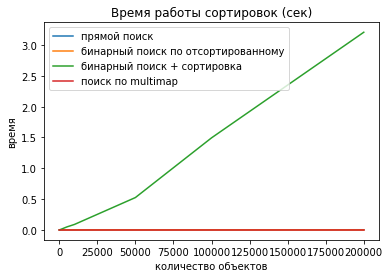

In [27]:
import matplotlib.pyplot as plt
# x - размер - который меняется
# y - время - которое мяняется
y = ns

plt.plot( y, line_search_time,label = 'прямой поиск')
plt.plot(y,binary_search_time,  label = 'бинарный поиск по отсортированному')
plt.plot( y,binary_and_sort_time, label = 'бинарный поиск + сортировка')
plt.plot( y,dict_time, label = 'поиск по multimap')
plt.title('Время работы сортировок (сек)')
plt.xlabel("количество объектов")
plt.ylabel("время")
plt.legend()
plt.show()

## Графики

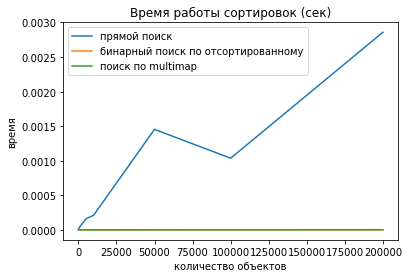

In [25]:
import matplotlib.pyplot as plt
# x - размер - который меняется
# y - время - которое мяняется
y = ns

plt.plot( y,line_search_time, label = 'прямой поиск')
plt.plot( y, binary_search_time,label = 'бинарный поиск по отсортированному')
plt.plot( y,dict_time, label = 'поиск по multimap')
plt.title('Время работы сортировок (сек)')
plt.xlabel("количество объектов")
plt.ylabel("время")
plt.legend()
plt.show()

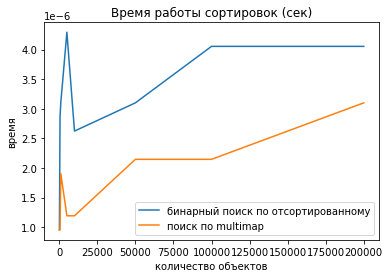

In [26]:
import matplotlib.pyplot as plt
# x - размер - который меняется
# y - время - которое мяняется
y = ns

plt.plot( y,binary_search_time, label = 'бинарный поиск по отсортированному')
plt.plot( y, dict_time,label = 'поиск по multimap')
plt.title('Время работы сортировок (сек)')
plt.xlabel("количество объектов")
plt.ylabel("время")
plt.legend()
plt.show()